<a href="https://www.kaggle.com/code/nainapandey96/air-passenger?scriptVersionId=99824601" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Time series analysis

For as long as we started recording our history, the time has been a crucial factor. In childhood, it was confusing to remember all the dates of important events that happened in past. Now it is one thing that helps us most to solve real-world problems. Let's start with a definition or whatever.

### What is Time Series?
![](http://miro.medium.com/max/962/1*h5wCzx78yGXxP1gz3LbrFw.png)

Time- series can be defined as a set of measurements of certain variables made at regular time intervals. Time act as an independent variable for estimation. A time series is defined by the values, Y1, Y2 of variable Y at time t1,t2 is given by:

                                                    Y=F(t)

Now in simple language, it is a sequence of data points collected over an interval of time.

What set time series data apart from other data is that the analysis can show how variable changes over time. It typically requires a large number of data points to ensure consistency and reliability.

### Why do we need Time series data?

1. It helps us to understand the underlying causes of trends or systemic patterns of time.
2. Using time series, we can do forecasting. It is part of predictive analysis,
3. We can check or evaluate the current progress.
4. We can also use the Time series to do Anomaly detection as well.

### Applications of Times series
![](https://miro.medium.com/max/1400/1*m6kTgKdnGIuqQJO6yKfLGg.png)

Time series analysis is used for non-stationary data, that is, data that constantly fluctuate or change with time. Mostly this analysis is used for stock market forecasting or weather forecasting, but there are many other fields in which tie series analysis is making news.

* Weather Forecasting and temperature recording
* Health Sector
* Sales and marketing
* Stock market
* Industry Forecasting

### What is stationarity?

When we are dealing with time series, we often come across a term called stationary. We have two types of time series that is, stationarity and non-stationarity. First, let's understand what it means when we say time series is stationary.

According to Wikipedia, a stationary process is “a process whose unconditional joint probability distribution does not change when shifted in time.” This means that time series will look the same at different points in time.

In simpler language, if a time series’s mean, variance, and co-variance all will remain constant then it is a stationary time series.
![](https://miro.medium.com/max/1400/1*ars_wRHju449aqxPDzhHYA.png)

Now, why do we need our time series to be stationary? This question might pop up in some minds. The answer is not that complicated or mathematical. We got to know what it is meant by Non-stationary time series. The statistical properties of such time series are continuously changing which will make it harder for us to take an average of such values over time. In turn, we cant do the forecasting of time series with variable statical properties.

### Stationarity Check

We have majorly two methods to check the stationarity of time series.

1. Visualizing the time series or what we call **Rolling statistics**
1. **Dickey-Fuller test**, this method is a statistical method to check the stationarity.

Before we dive further in this notebook. lets understand the dataset first and set the objective of this notebook.

**About dataset:**  The air passenger dataset provides monthly total of US airline passengers, from 1949 to 1960. This dataset is of a timeseries class.

we have two objective in this notebook.
1. Check for the stationary of your data using Rolling Statistics and Dickey-fuller test.
2. if stationary is present, remove it using differencing in python.

So lets begin

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airpassengers/AirPassengers.csv


In [2]:
!pip install statsmodels==0.12.2
from datetime import datetime as dt
df_air=pd.read_csv("/kaggle/input/airpassengers/AirPassengers.csv")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.19.0 requires statsmodels>=0.13, but you have statsmodels 0.12.2 which is incompatible.


In [3]:
df_air.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
#Lets check basic info 
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df_air.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
df_air['Month']=df_air['Month'].apply(lambda x: dt(int(x[:4]), int(x[5:]),15))
df_air= df_air.set_index('Month')
df_air.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


<AxesSubplot:xlabel='#Passengers', ylabel='Count'>

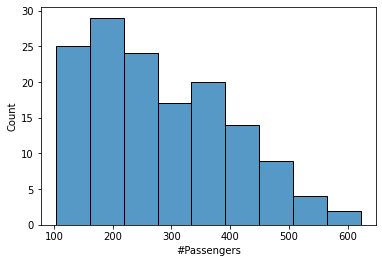

In [7]:
import seaborn as sns
sns.histplot(df_air['#Passengers'])

<AxesSubplot:xlabel='#Passengers', ylabel='Count'>

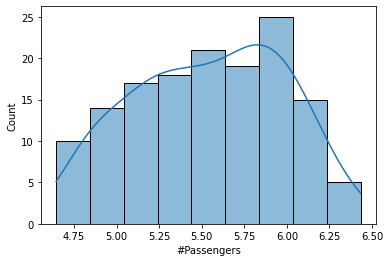

In [8]:
import math
ts= df_air['#Passengers']
ts_log=np.log(ts)
sns.histplot(ts_log, kde=True)

In [9]:
#Now we have our small dataset and info about it. Lets import the libraries we need
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf #For dickey fuller test
from statsmodels.tsa.arima_model import ARIMA # We will be using ARIMA model 
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import warnings
warnings.filterwarnings('ignore')

We can see this time series is definetly not a stationary one but we will go ahaead to check it using rolling statistics method and Dickey fuller test.

In [10]:
# We will define a function for to check stationarity

def check_station(timeseries):
    #determing rolling mean
    rolmean=timeseries.rolling(window=42, center=False).mean()
    rolstd=timeseries.rolling(window=42, center=False).std()
    #Plot rolling statistics
    orignal= plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling mean')
    std=plt.plot(rolstd,color='black',label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Meanand Standard Deviation')
    plt.show(block=False)
    #Now we will check for dickey fuller test
    print('Results of Dickey Fuller Test:')
    dftest=adfuller(timeseries, autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Used','No of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key]=value
    print(dfoutput)


**For autolag, values of autolag{“AIC”, “BIC”, “t-stat”, None}**

Method to use when automatically determining the lag length among the values 0, 1, …, maxlag.

1. If “AIC” (default) or “BIC”, then the number of lags is chosen to minimize the corresponding information criterion. 
2. “t-stat” based choice of maxlag. Starts with maxlag and drops a lag until the t-statistic on the last lag length is significant using a 5%-sized test.
3. If None, then the number of included lags is set to maxlag.

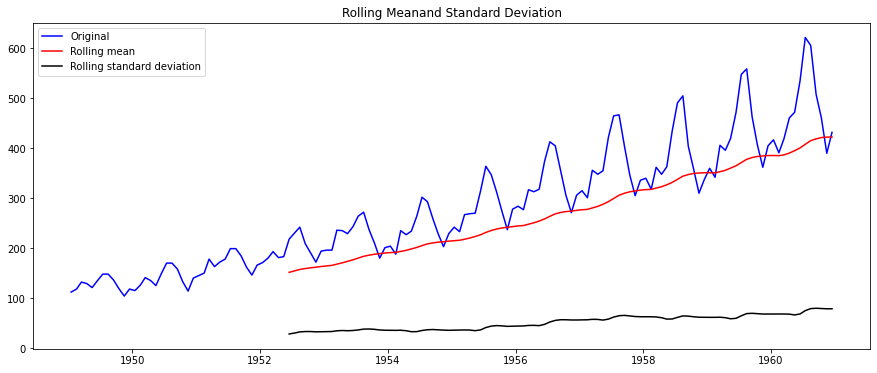

Results of Dickey Fuller Test:
Test Statistic               0.815369
p-value                      0.991880
#Lags Used                  13.000000
No of observations used    130.000000
Critical Value (1%)         -3.481682
Critical Value (5%)         -2.884042
Critical Value (10%)        -2.578770
dtype: float64


In [11]:
check_station(df_air['#Passengers'])

We can see rolling statistics are increasing and in adfuller test we can see test statistics > Critical value which fails to reject our null hypothesis that is timeseries is not stationary. 

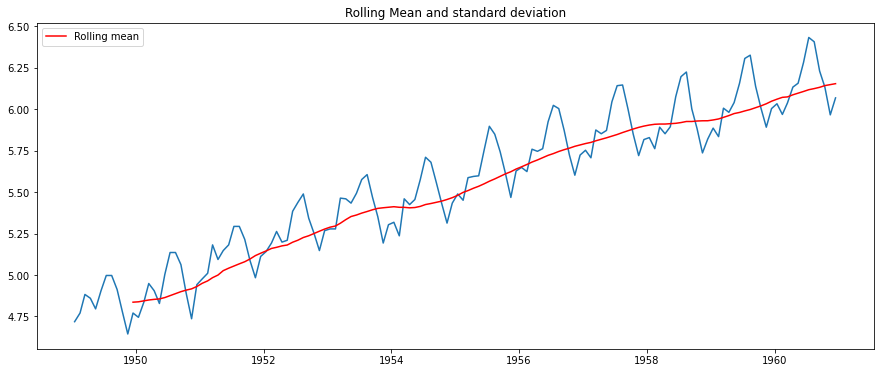

In [12]:
#Now when we move to second objective that is to stationarize the timeseries.
movingAvg= ts_log.rolling(window=12).mean()
movingStd=ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAvg, color='Red', label='Rolling mean')
#plt.plot(movingStd, color='Black', label='Rolling std')
plt.title('Rolling Mean and standard deviation')
plt.legend(loc='best')
plt.show()

In [13]:
#check_station(ts_log_mv_diff)
ts_log_diff= ts_log- movingAvg
ts_log_diff.dropna(inplace=True)
ts_log_diff.head(10)


Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

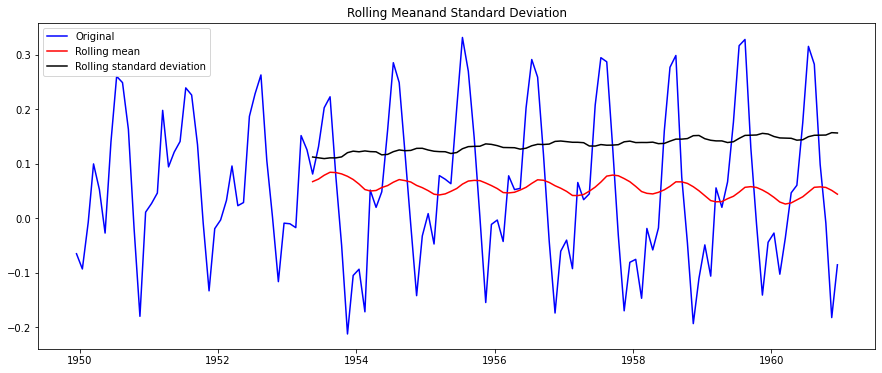

Results of Dickey Fuller Test:
Test Statistic              -3.162908
p-value                      0.022235
#Lags Used                  13.000000
No of observations used    119.000000
Critical Value (1%)         -3.486535
Critical Value (5%)         -2.886151
Critical Value (10%)        -2.579896
dtype: float64


In [14]:
check_station(ts_log_diff)

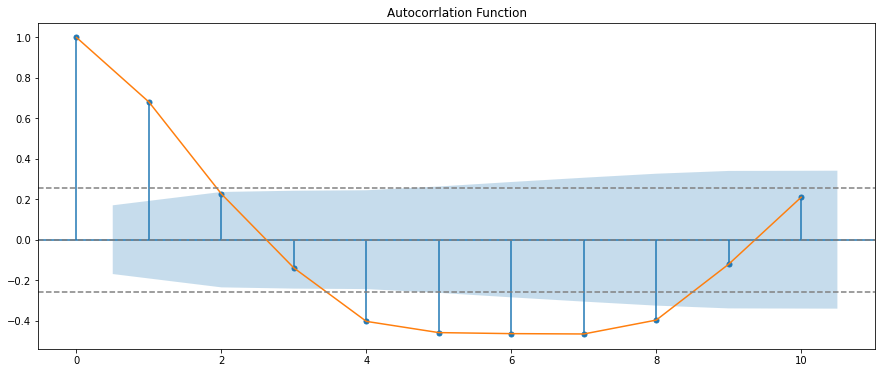

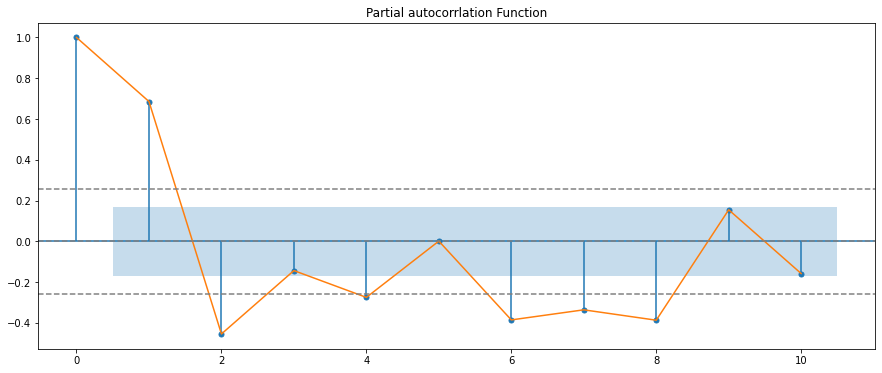

In [15]:
#We will obtain ACF and PACF
import statsmodels.api as sm
#ACF
sm.graphics.tsa.plot_acf(ts_log_diff.values.squeeze(), lags=10)
plt.plot(np.arange(0,11),acf(ts_log_diff, nlags=10)) #arange() function is used to get evenly spaced values within a given interval
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-2.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=2.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrlation Function')
plt.show()

#PACF
sm.graphics.tsa.plot_pacf(ts_log_diff.values.squeeze(), lags=10)
plt.plot(np.arange(0,11), pacf(ts_log_diff, nlags=10)) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-2.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=2.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial autocorrlation Function')
plt.show()


**ACF** curve crosses the upper confidence value when the lag value is between 0 and 1. Thus, optimal value of q in the ARIMA model must be 0 or 1.

**PACF** curve drops to 0 between lag values 1 and 2. Thus, optimal value of p in the ARIMA model is 1 or 2.

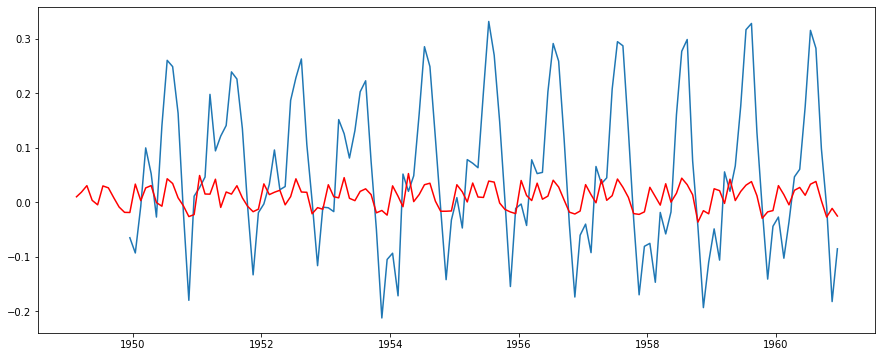

In [16]:
model=ARIMA(ts_log, order=(1,1,0))
results_ARIMA= model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='Red')

In [17]:
pred_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues, copy=True)# We will store predictions in seperate series
print(pred_ARIMA_diff.head())

Month
1949-02-15    0.009676
1949-03-15    0.018164
1949-04-15    0.030130
1949-05-15    0.003154
1949-06-15   -0.005039
dtype: float64


The way to convert the differencing to log scale is to add these difference consecutively to the base number. An easier way to do it is to first determine the cumulative sum at index and then add it to the base number.

In [18]:
pred_ARIMA_sum=pred_ARIMA_diff.cumsum()
pred_ARIMA_sum.head()

Month
1949-02-15    0.009676
1949-03-15    0.027839
1949-04-15    0.057969
1949-05-15    0.061123
1949-06-15    0.056084
dtype: float64

In [19]:
pred_ARIMA_log=pd.Series(ts_log[0],index=ts_log.index)
pred_ARIMA_log=pred_ARIMA_log.add(pred_ARIMA_sum, fill_value=0)
pred_ARIMA_log.head()

Month
1949-01-15    4.718499
1949-02-15    4.728175
1949-03-15    4.746338
1949-04-15    4.776468
1949-05-15    4.779622
dtype: float64

Text(0.5, 1.0, 'RMSE: 52.1841')

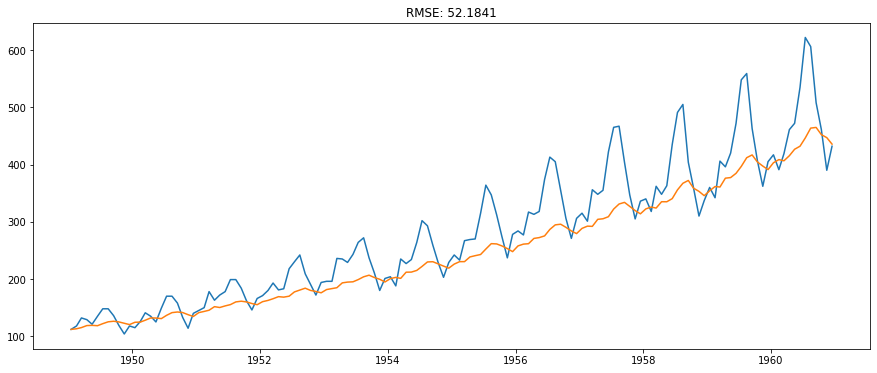

In [20]:
prediction_ARIMA= np.exp(pred_ARIMA_log)
plt.plot(ts)
plt.plot(prediction_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((prediction_ARIMA-ts)**2)/len(ts)))

So our model is working fine when it comes to capturing trend but it is not working great when it comes to seasonailty. 

I hope this give some clarity on how to check if your timeseries is stationary or not and to use differencing to stationarize the data.How to use arima please note i used statsmodel v0.12.2 if you are using updated statsmodel you might face issue while defining your model and chart may come out distorted.

Happy coding!!  

My article on basic time series concept [https://nancypandey.medium.com/time-series-analysis-everything-you-need-to-know-70578321085e](http://)